<h1>Behavioral analysis of social network users in relation to vaccination of covid-19)</h1>
<h3>Gabriela Tavares Boscarol</h3>
<h3>Marcus Vinícius Souza Costa</h3>

Imports and functions definitions

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from matplotlib import pyplot as plt
import re
from matplotlib.ticker import EngFormatter

%matplotlib inline 
#Adjust your font-size here
plt.rcParams.update({'font.size': 14})

#convert date to YYYY-MM-DD hh:mm:ss format
def adjustDateFormat(date):
    return re.sub(r'(\d{1,2})-(\d{1,2})-(\d{4})', '\\3-\\2-\\1', date)


#creates a function to remove all @'s, hashtags, and links
#Then applies it to the dataframe
def cleanUpTweetsAndComments(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt, flags=re.IGNORECASE)
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    txt = re.sub(r'&amp;', '', txt, flags=re.IGNORECASE)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'http\S+', '', txt, flags=re.IGNORECASE) 
    #removes stop words
    txt = re.sub(r'the' , '', txt, flags=re.IGNORECASE)
    txt = re.sub(r'and' , '', txt, flags=re.IGNORECASE)
    txt = re.sub(r'to ', '', txt, flags=re.IGNORECASE)
    txt =re.sub(r'covid','',txt, flags=re.IGNORECASE)
    txt =re.sub(r'vaccine','',txt, flags=re.IGNORECASE)
    txt =re.sub(r'i\'m','',txt, flags=re.IGNORECASE)
    txt =re.sub('[0-9]','',txt, flags=re.IGNORECASE)
    #removes non-ascci characters
    txt=re.sub(r'[^\x00-\x7f]','', txt) 
    return txt


#Importing dataframes

#Avaliable on https://www.kaggle.com/gpreda/all-covid19-vaccines-tweets
twitter_df=pd.read_csv('datasets/vaccination_all_tweets.csv', low_memory=False)
#Avaliable on https://www.kaggle.com/xhlulu/covid19-vaccine-news-reddit-discussions
reddit_df=pd.read_csv('datasets/reddit_comments.csv')
#Avaliable on https://www.kaggle.com/gpreda/pfizer-vaccine-tweets
twitter_pfizer_df=pd.read_csv('datasets/pfizer_biontech_tweets.csv')
#Avaliable on https://www.kaggle.com/gpreda/pfizer-vaccine-on-reddit
reddit_pfizer_df=pd.read_csv('datasets/reddit_pfizer_vaccine.csv')


Evolution of tweets about COVID-19 vaccines used in entire world

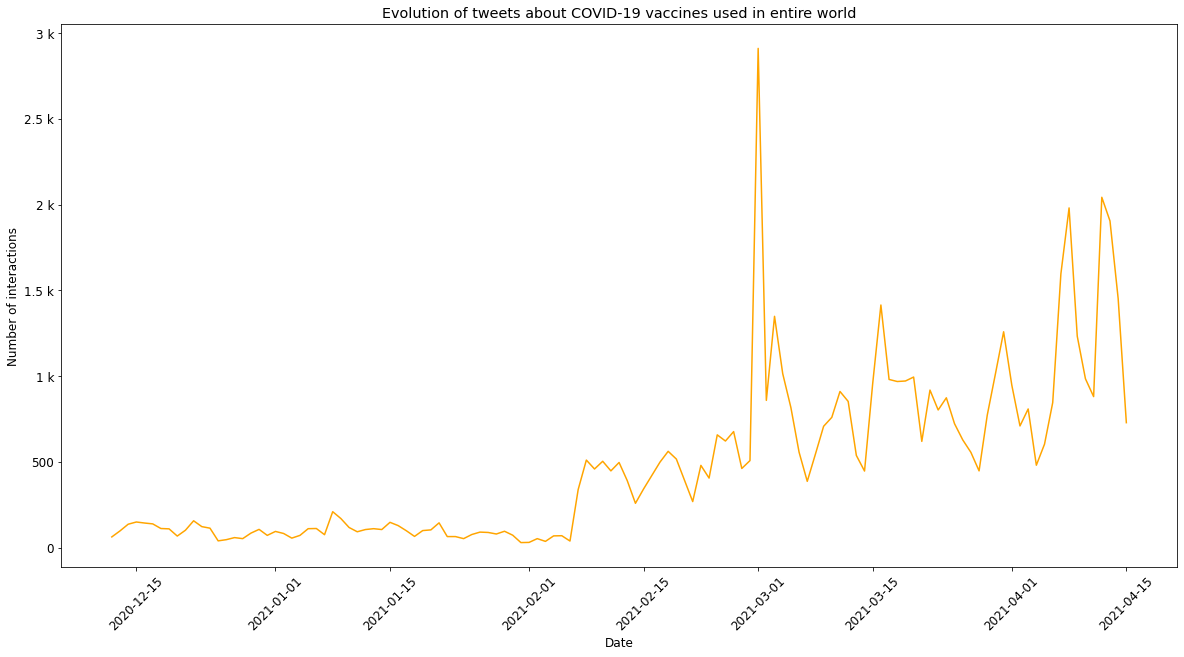

In [24]:
#twitter_df=pd.read_csv('datasets/covidvaccine_hashtag.csv', low_memory=False)
#Avaliable in https://www.kaggle.com/gpreda/all-covid19-vaccines-tweets
twitter_df=pd.read_csv('datasets/vaccination_all_tweets.csv', low_memory=False)
twitter_df['date']=twitter_df['date'].dropna().apply(adjustDateFormat)
twitter_data=pd.to_datetime(twitter_df['date'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df = (pd.to_datetime(twitter_data.dropna())
       .dt.floor('d')
       .value_counts()
       .rename_axis('date')
       .reset_index(name='count'))
#df=df.groupby(pd.Grouper(key='date',freq='1M')).sum().reset_index()
df=df.sort_values(by='date')
#Defining engineering notation for Y-Axis
formatter = EngFormatter()
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(formatter)
plt.plot(df['date'],df['count'], c='orange')
plt.xlabel('Date')
plt.ylabel('Number of interactions')
plt.title('Evolution of tweets about COVID-19 vaccines used in entire world')
plt.show()

Evolution of discussions about COVID-19 vaccination on Reddit

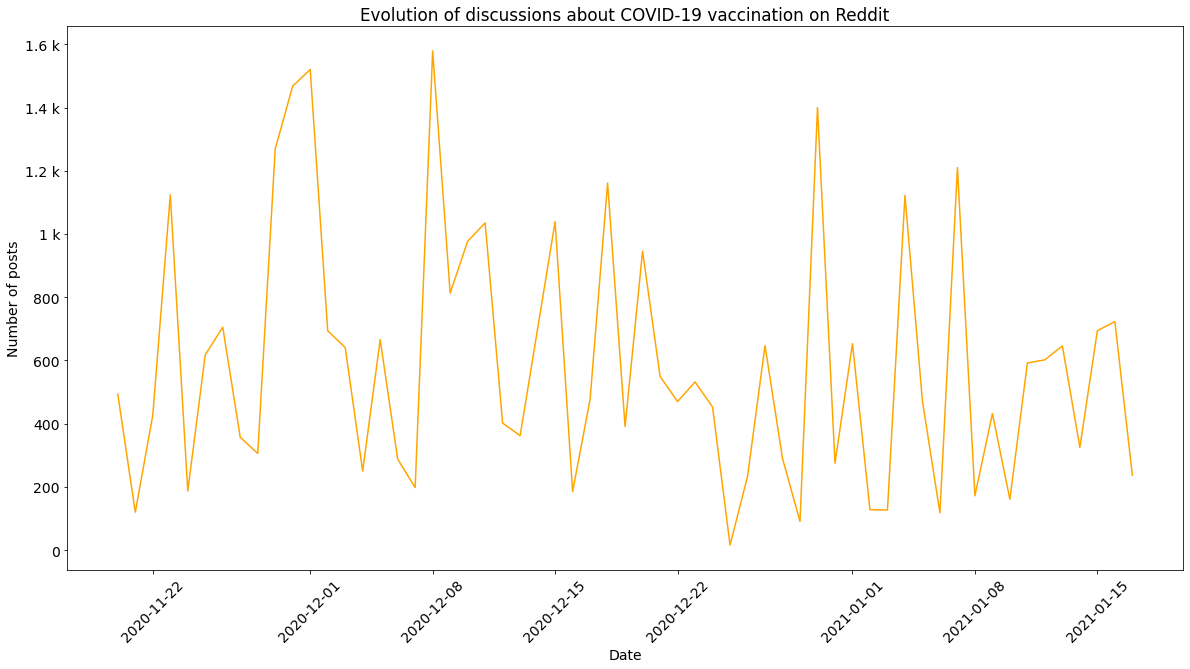

In [12]:
reddit_df['post_date']=reddit_df['post_date'].dropna().apply(adjustDateFormat)
reddit_data=pd.to_datetime(reddit_df['post_date'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df = (pd.to_datetime(reddit_data.dropna())
       .dt.floor('d')
       .value_counts()
       .rename_axis('date')
       .reset_index(name='count'))

df=df.sort_values(by='date')

#Defining engineering notation for Y-Axis
formatter = EngFormatter()
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=45)
plt.plot(df['date'],df['count'], c='orange')
plt.xlabel('Date')
plt.ylabel('Number of posts')
plt.title('Evolution of discussions about COVID-19 vaccination on Reddit')
plt.show()

Generating word cloud of tweets about COVID-19 vaccines

(-0.5, 399.5, 199.5, -0.5)

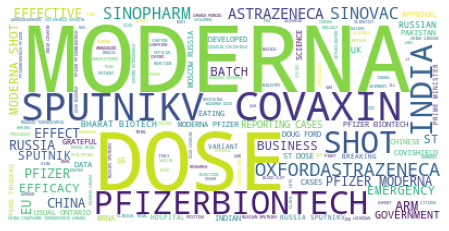

In [4]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

stopwords = set(STOPWORDS)
for i in open('stopwords/twitter-stopwords.txt', "r").read().split(','):
    stopwords.add(i)
for i in open('stopwords/twitter-stopwords - TA.txt', "r").read().split(','):
    stopwords.add(i)
for i in open('stopwords/common-english-verbs.txt', "r").read().split(','):
    stopwords.add(i)    
for i in open('stopwords/common-english-prep-conj.txt', "r").read().split(','):
    stopwords.add(i) 
for i in open('stopwords/common-english-words.txt', "r").read().split(','):
    stopwords.add(i)     
for i in open('stopwords/smart-common-words.txt', "r").read().split(','):
    stopwords.add(i)         
for i in open('stopwords/stopWords.txt', "r").read().split('\n'):
    stopwords.add(i)      
for i in open('stopwords/punctuation.txt', "r").read().split('\n'):
    stopwords.add(i)         
stopwords.add("00A0")
stopwords.add("00BD")
stopwords.add("00B8")
stopwords.add("t")
stopwords.add("co")
stopwords.add("going")
stopwords.add("ed")
stopwords.add("covidvaccine")
stopwords.add("covid")
stopwords.add("corona")
stopwords.add("bot")
stopwords.add("covid19")
stopwords.add("covid-19")
stopwords.add("coronavirusvaccine")
stopwords.add("coronavaccine")
stopwords.add("got")
stopwords.add("will")
stopwords.add("day")
stopwords.add("re")
stopwords.add("coronavirus")
stopwords.add("new")
stopwords.add("now")
stopwords.add("one")
stopwords.add("vaccine")
stopwords.add("covidvaccination")
stopwords.add("vaccination")
stopwords.add("vaccinated")
stopwords.add("vaccinations")
stopwords.add("vaccinate")
stopwords.add("vaccines")
stopwords.add("s")
stopwords.add("m")
stopwords.add("ir")
stopwords.add("pemic")
stopwords.add("covid_19")
stopwords.add("virus")
wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in twitter_df['text'].dropna().apply(cleanUpTweetsAndComments).str.upper()]))
plt.figure(figsize=(10,4))
#plt.title("Tweets about COVID-19")
#plt.title("Tweets with hashtag 'covidvaccine'")
plt.imshow(wordcloud)
plt.axis("off")

Generating word cloud of Reddit users about COVID-19 vaccines

(-0.5, 399.5, 199.5, -0.5)

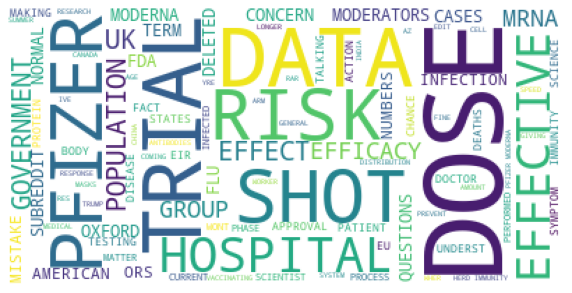

In [5]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import re


stopwords_reddit = set(STOPWORDS)
for i in open('stopwords/twitter-stopwords.txt', "r").read().split(','):
    stopwords_reddit.add(i)
for i in open('stopwords/twitter-stopwords - TA.txt', "r").read().split(','):
    stopwords_reddit.add(i)
for i in open('stopwords/common-english-verbs.txt', "r").read().split(','):
    stopwords_reddit.add(i)    
for i in open('stopwords/common-english-prep-conj.txt', "r").read().split(','):
    stopwords_reddit.add(i) 
for i in open('stopwords/common-english-words.txt', "r").read().split(','):
    stopwords_reddit.add(i)     
for i in open('stopwords/smart-common-words.txt', "r").read().split(','):
    stopwords_reddit.add(i)         
for i in open('stopwords/stopWords.txt', "r").read().split('\n'):
    stopwords_reddit.add(i)      
for i in open('stopwords/punctuation.txt', "r").read().split('\n'):
    stopwords_reddit.add(i)               
stopwords_reddit.add("00A0")
stopwords_reddit.add("00BD")
stopwords_reddit.add("00B8")
stopwords_reddit.add("t")
stopwords_reddit.add("co")
stopwords_reddit.add("going")
stopwords_reddit.add("ed")
stopwords_reddit.add("covidvaccine")
stopwords_reddit.add("covid")
stopwords_reddit.add("corona")
stopwords_reddit.add("bot")
stopwords_reddit.add("covid19")
stopwords_reddit.add("coronavirusvaccine")
stopwords_reddit.add("coronavaccine")
stopwords_reddit.add("got")
stopwords_reddit.add("will")
stopwords_reddit.add("day")
stopwords_reddit.add("re")
stopwords_reddit.add("coronavirus")
stopwords_reddit.add("new")
stopwords_reddit.add("now")
stopwords_reddit.add("one")
stopwords_reddit.add("vaccine")
stopwords_reddit.add("covidvaccination")
stopwords_reddit.add("vaccination")
stopwords_reddit.add("vaccinated")
stopwords_reddit.add("vaccinations")
stopwords_reddit.add("vaccinate")
stopwords_reddit.add("vaccines")
stopwords_reddit.add("s")
stopwords_reddit.add("m")
stopwords_reddit.add("ir")
stopwords_reddit.add("pemic")
stopwords_reddit.add("covid_19")
stopwords_reddit.add("virus")
stopwords_reddit.add('%')
stopwords_reddit.add('[removed]')
stopwords_reddit.add('se')
stopwords_reddit.add('it.')
stopwords_reddit.add("y're")
wordcloud_reddit = WordCloud(background_color="white", stopwords=stopwords_reddit,random_state = 2016).generate(" ".join([i for i in reddit_df['comment_body'].dropna().apply(cleanUpTweetsAndComments).str.upper()]))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud_reddit)
plt.axis("off")

Performing most common tweeted' words analysis

<BarContainer object of 10 artists>

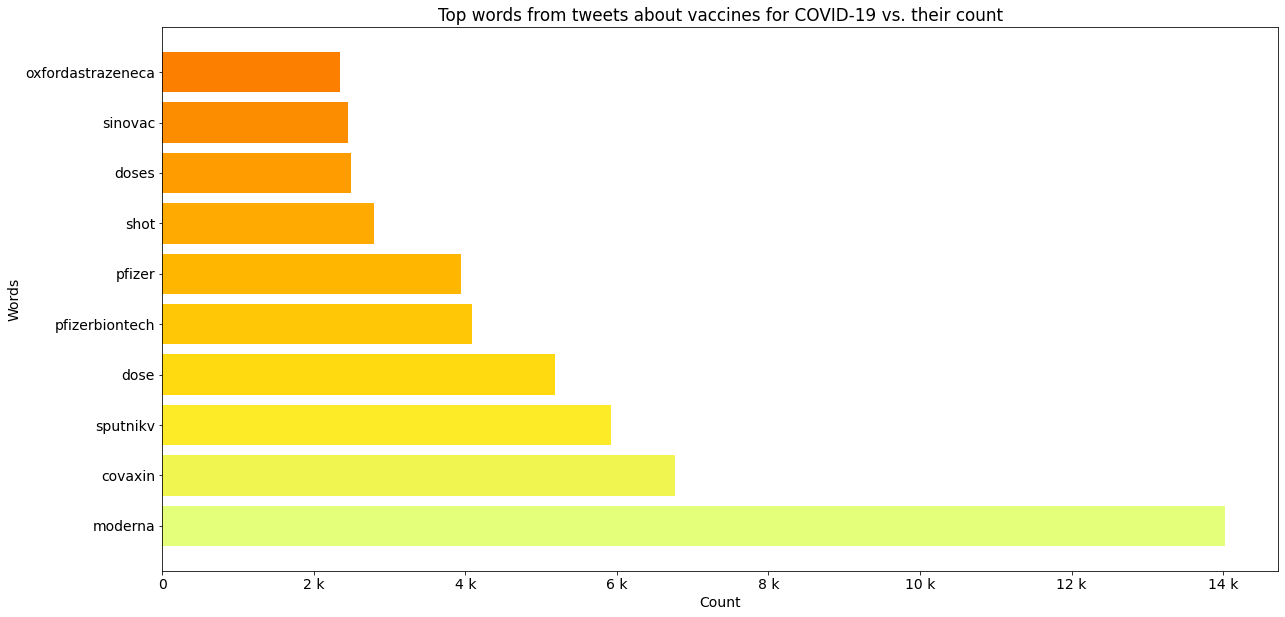

In [6]:
import collections
import re
import matplotlib.cm as cm
from matplotlib import rcParams
all_headlines = ' '.join(twitter_df['text'].dropna().apply(cleanUpTweetsAndComments).str.lower())
filtered_words = [word for word in all_headlines.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

top_words_twitter = []
counts = []
for letter, count in counted_words.most_common(10):
    top_words_twitter.append(letter)
    counts.append(count)
colors = cm.Wistia(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10
plt.title('Top words from tweets about vaccines for COVID-19 vs. their count')
formatter = EngFormatter()
plt.gca().xaxis.set_major_formatter(formatter)
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(top_words_twitter, counts, color=colors) 

Performing most common words analysis on Reddit

<BarContainer object of 10 artists>

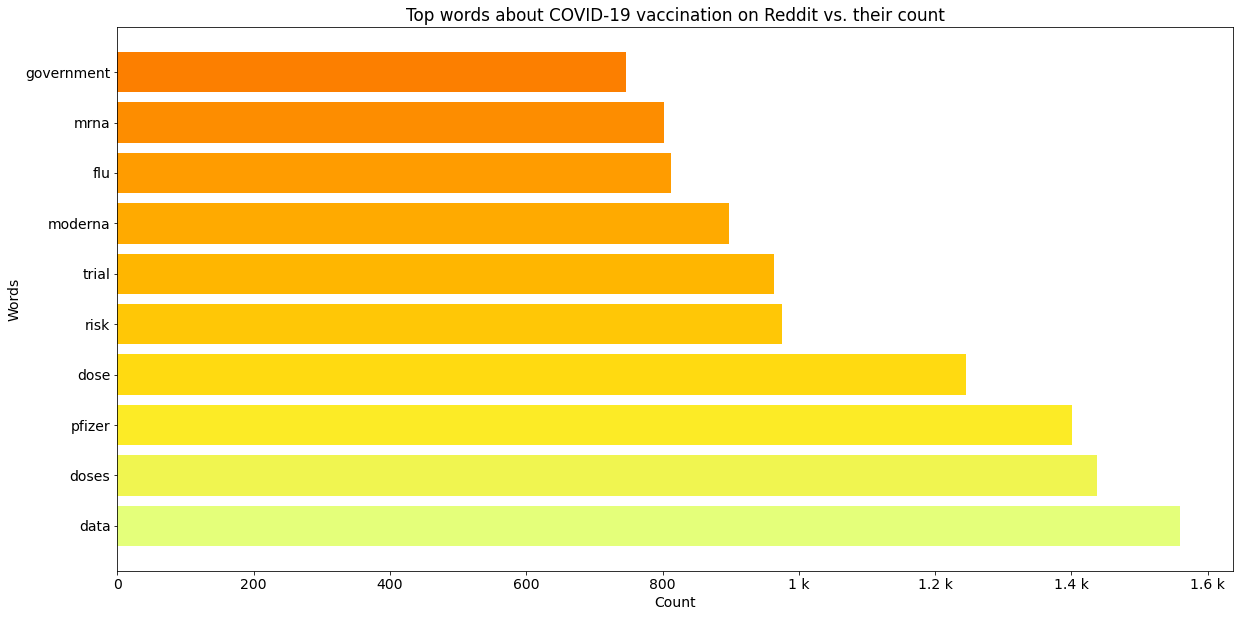

In [7]:
import collections
import re
import matplotlib.cm as cm
from matplotlib import rcParams
all_headlines = ' '.join(reddit_df['comment_body'].dropna().apply(cleanUpTweetsAndComments).str.lower())
filtered_words = [word for word in all_headlines.split() if word not in stopwords_reddit]
counted_words = collections.Counter(filtered_words)

top_words_reddit = []
counts = []
for letter, count in counted_words.most_common(10):
    top_words_reddit.append(letter)
    counts.append(count)
colors = cm.Wistia(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words about COVID-19 vaccination on Reddit vs. their count')
plt.gca().xaxis.set_major_formatter(formatter)
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(top_words_reddit, counts, color=colors)    

Top words evolution in Tweets

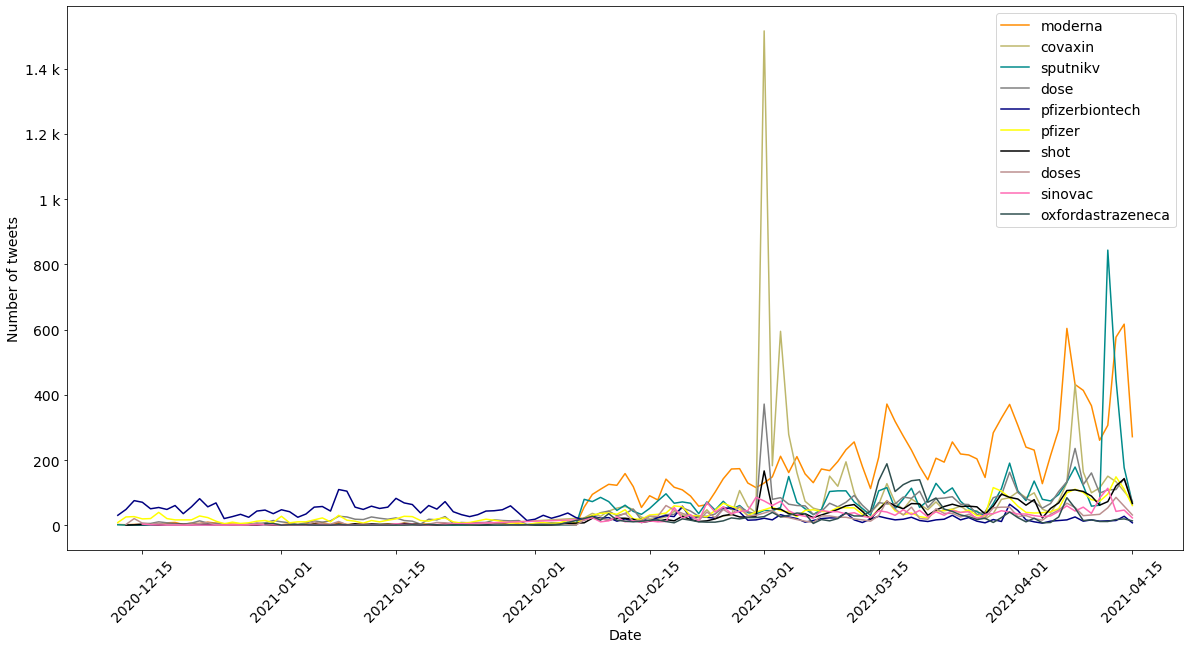

In [10]:
colors=['darkorange', 'darkkhaki', 'darkcyan','grey', 'navy', 'yellow', 'black', 'rosybrown', 'hotpink', 'darkslategrey']
cont=0
for word in top_words_twitter:
    regex=r'(?<![^\W_])'+word+'(?![^\W_])'
    top_word_df=twitter_df[twitter_df['text'].dropna().str.contains(regex, case=False)]
    top_word_df = (pd.to_datetime(top_word_df['date'].dropna())
       .dt.floor('d')
       .value_counts()
       .rename_axis('date')
       .reset_index(name='count')) 
    top_word_df=top_word_df.sort_values(by='date')
    plt.plot(top_word_df['date'], top_word_df['count'], label=word, color=colors[cont])
    cont+=1
#plt.gca().set_prop_cycle(color=colors)
plt.legend() 

#Defining engineering notation for Y-Axis
formatter = EngFormatter()  
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel('Date')
plt.ylabel('Number of tweets')    
plt.show()

Top words evolution in Reddit posts

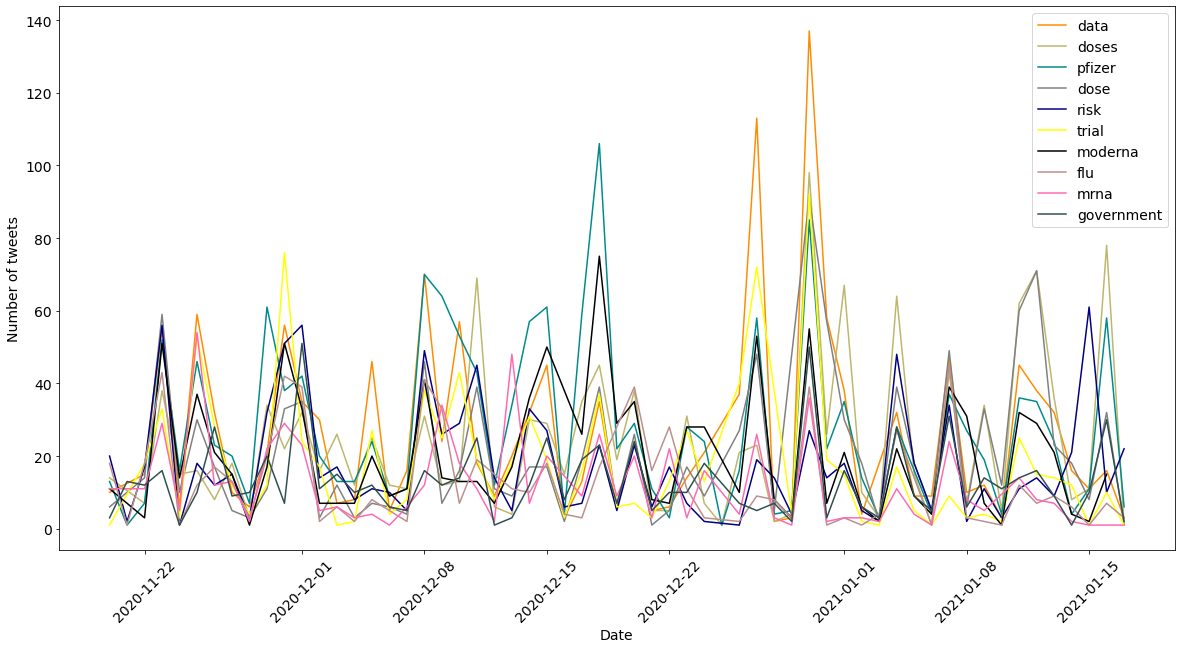

In [11]:
colors=['darkorange', 'darkkhaki', 'darkcyan','grey', 'navy', 'yellow', 'black', 'rosybrown', 'hotpink', 'darkslategrey']
cont=0
for word in top_words_reddit:
    regex=r'(?<![^\W_])'+word+'(?![^\W_])'
    top_word_df=reddit_df[reddit_df['comment_body'].dropna().str.contains(regex, case=False)]
    top_word_df = (pd.to_datetime(top_word_df['post_date'].dropna())
       .dt.floor('d')
       .value_counts()
       .rename_axis('date')
       .reset_index(name='count')) 
    top_word_df=top_word_df.sort_values(by='date')
    plt.plot(top_word_df['date'], top_word_df['count'], label=word, color=colors[cont])
    cont+=1
plt.legend() 

#Defining engineering notation for Y-Axis
formatter = EngFormatter()  
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel('Date')
plt.ylabel('Number of tweets')    
plt.show()

Reddit sentimental analysis about Pfizer/BionTech vaccine

52.24344224574321 % of positive posts
28.23573400828348 % of neutral posts
19.52082374597331 % of negative posts


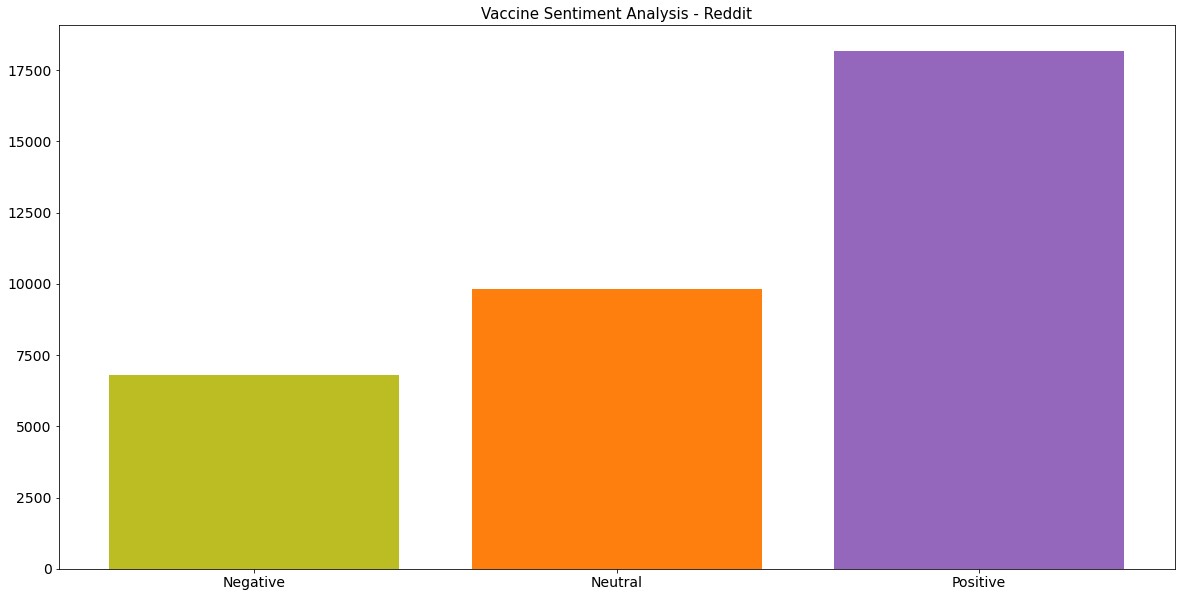

In [83]:
from textblob import TextBlob
reddit_sentimental_analysis_df=pd.DataFrame()
#creates a function that determines subjectivity and polarity from publications. Avaliable in https://towardsdatascience.com/sentiment-analysis-evaluating-the-publics-perception-of-the-covid19-vaccine-bef564591078
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity #applies these functions to the dataframe
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive" 
#creates another column called Score and applies the function to the dataframe
reddit_comments=reddit_df['comment_body'].dropna().apply(cleanUpTweetsAndComments)
reddit_sentimental_analysis_df['Subjectivity'] = reddit_comments.apply(getTextSubjectivity)
reddit_sentimental_analysis_df['Polarity'] = reddit_comments.apply(getTextPolarity) #builds a function to calculate and categorize each tweet as Negative, Neutral, and Positive
reddit_sentimental_analysis_df['Score'] = reddit_sentimental_analysis_df['Polarity'].apply(getTextAnalysis)


labels = reddit_sentimental_analysis_df.groupby('Score').count().index.values
values = reddit_sentimental_analysis_df.groupby('Score').size().values
plt.bar(labels, values, color = ['tab:olive', 'tab:orange', 'tab:purple'])
plt.title(label = "Vaccine Sentiment Analysis - Reddit", 
                  fontsize = '15')
#calculates percentage of positive, negative, and neutral tweets
positive = reddit_sentimental_analysis_df[reddit_sentimental_analysis_df['Score'] == 'Positive']
print(str(positive.shape[0]/(reddit_sentimental_analysis_df.shape[0])*100) + " % of positive posts")
positive = reddit_sentimental_analysis_df[reddit_sentimental_analysis_df['Score'] == 'Neutral']
print(str(positive.shape[0]/(reddit_sentimental_analysis_df.shape[0])*100) + " % of neutral posts")
positive = reddit_sentimental_analysis_df[reddit_sentimental_analysis_df['Score'] == 'Negative']
print(str(positive.shape[0]/(reddit_sentimental_analysis_df.shape[0])*100) + " % of negative posts")

Twitter sentimental analysis about COVID-19 vaccine

41.10243271479031 % of positive tweets
46.168515662570684 % of neutral tweets
12.729051622639007 % of negative tweets


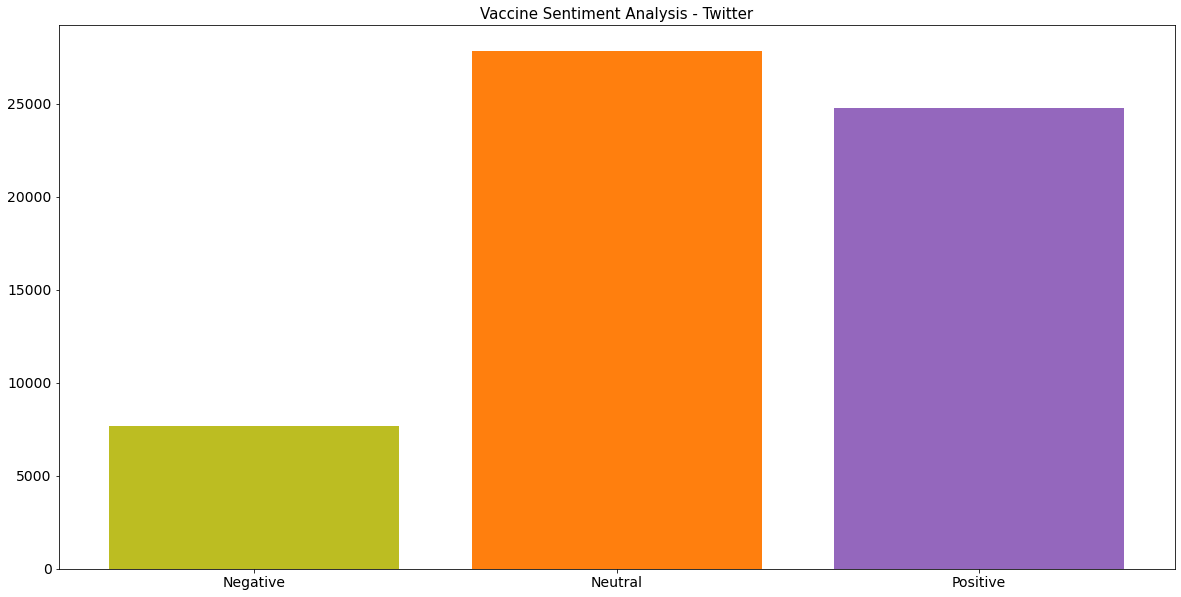

In [84]:
from textblob import TextBlob
twitter_sentimental_analysis_df=pd.DataFrame()
#creates a function that determines subjectivity and polarity from publications. Avaliable in https://towardsdatascience.com/sentiment-analysis-evaluating-the-publics-perception-of-the-covid19-vaccine-bef564591078
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity #applies these functions to the dataframe
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive" 
#creates another column called Score and applies the function to the dataframe
tweets=twitter_df['text'].dropna().apply(cleanUpTweetsAndComments)
twitter_sentimental_analysis_df['Subjectivity'] = tweets.apply(getTextSubjectivity)
twitter_sentimental_analysis_df['Polarity'] = tweets.apply(getTextPolarity) #builds a function to calculate and categorize each tweet as Negative, Neutral, and Positive
twitter_sentimental_analysis_df['Score'] = twitter_sentimental_analysis_df['Polarity'].apply(getTextAnalysis)


labels = twitter_sentimental_analysis_df.groupby('Score').count().index.values
values = twitter_sentimental_analysis_df.groupby('Score').size().values
plt.bar(labels, values, color = ['tab:olive', 'tab:orange', 'tab:purple'])
plt.title(label = "Vaccine Sentiment Analysis - Twitter", fontsize = '15')
#calculates percentage of positive, negative, and neutral tweets
positive = twitter_sentimental_analysis_df[twitter_sentimental_analysis_df['Score'] == 'Positive']
print(str(positive.shape[0]/(twitter_sentimental_analysis_df.shape[0])*100) + " % of positive tweets")
positive = twitter_sentimental_analysis_df[twitter_sentimental_analysis_df['Score'] == 'Neutral']
print(str(positive.shape[0]/(twitter_sentimental_analysis_df.shape[0])*100) + " % of neutral tweets")
positive = twitter_sentimental_analysis_df[twitter_sentimental_analysis_df['Score'] == 'Negative']
print(str(positive.shape[0]/(twitter_sentimental_analysis_df.shape[0])*100) + " % of negative tweets")

Sentimental analysis about Pfizer/BioNTech tweets

44.63574457150199 % of positive tweets
45.11113966336888 % of neutral tweets
10.253115765129127 % of negative tweets


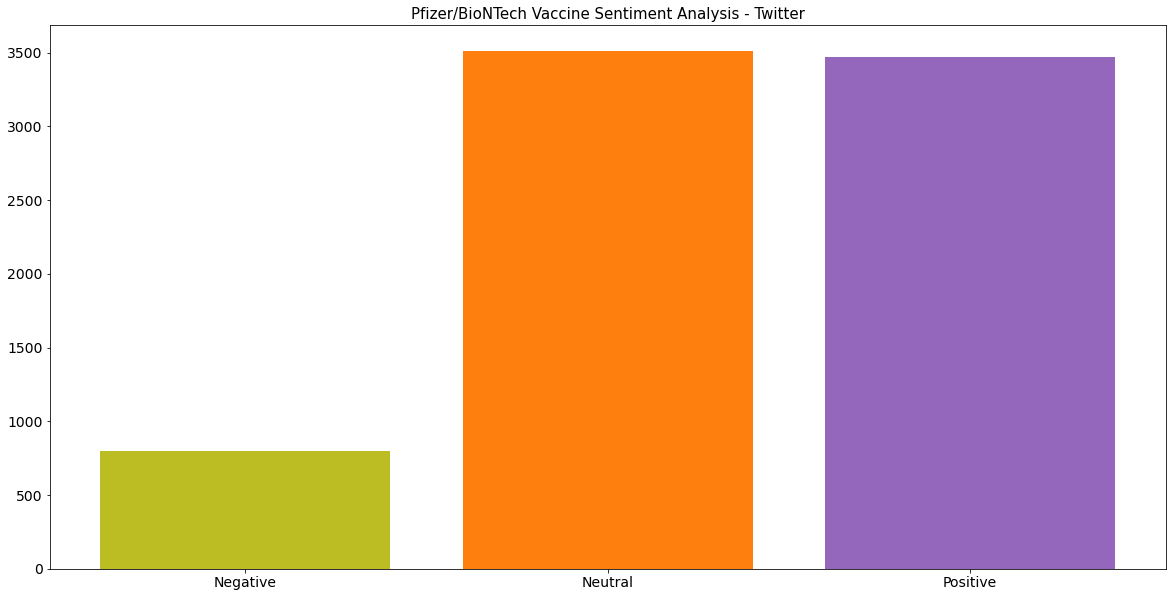

In [85]:
from textblob import TextBlob
twitter_sentimental_analysis_df=pd.DataFrame()
#creates a function that determines subjectivity and polarity from publications. Avaliable in https://towardsdatascience.com/sentiment-analysis-evaluating-the-publics-perception-of-the-covid19-vaccine-bef564591078
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity #applies these functions to the dataframe
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive" 
#creates another column called Score and applies the function to the dataframe
tweets=twitter_pfizer_df['text'].dropna().apply(cleanUpTweetsAndComments)
twitter_sentimental_analysis_df['Subjectivity'] = tweets.apply(getTextSubjectivity)
twitter_sentimental_analysis_df['Polarity'] = tweets.apply(getTextPolarity) #builds a function to calculate and categorize each tweet as Negative, Neutral, and Positive
twitter_sentimental_analysis_df['Score'] = twitter_sentimental_analysis_df['Polarity'].apply(getTextAnalysis)


labels = twitter_sentimental_analysis_df.groupby('Score').count().index.values
values = twitter_sentimental_analysis_df.groupby('Score').size().values
plt.bar(labels, values, color = ['tab:olive', 'tab:orange', 'tab:purple'])
plt.title(label = "Pfizer/BioNTech Vaccine Sentiment Analysis - Twitter", fontsize = '15')
#calculates percentage of positive, negative, and neutral tweets
positive = twitter_sentimental_analysis_df[twitter_sentimental_analysis_df['Score'] == 'Positive']
print(str(positive.shape[0]/(twitter_sentimental_analysis_df.shape[0])*100) + " % of positive tweets")
positive = twitter_sentimental_analysis_df[twitter_sentimental_analysis_df['Score'] == 'Neutral']
print(str(positive.shape[0]/(twitter_sentimental_analysis_df.shape[0])*100) + " % of neutral tweets")
positive = twitter_sentimental_analysis_df[twitter_sentimental_analysis_df['Score'] == 'Negative']
print(str(positive.shape[0]/(twitter_sentimental_analysis_df.shape[0])*100) + " % of negative tweets")

Sentimental analysis about Pfizer/BioNTech Reddit post

57.669172932330824 % of positive posts
17.518796992481203 % of neutral posts
24.81203007518797 % of negative posts


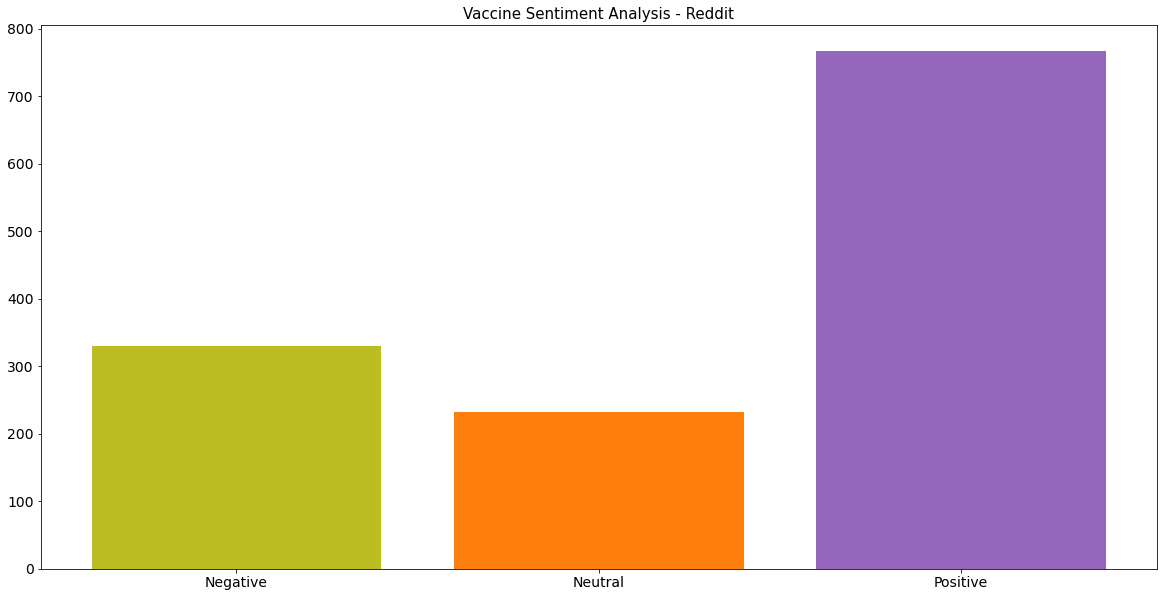

In [86]:
from textblob import TextBlob
reddit_sentimental_analysis_df=pd.DataFrame()
#creates a function that determines subjectivity and polarity from publications. Avaliable in https://towardsdatascience.com/sentiment-analysis-evaluating-the-publics-perception-of-the-covid19-vaccine-bef564591078
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity #applies these functions to the dataframe
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive" 
#creates another column called Score and applies the function to the dataframe
reddit_comments=reddit_pfizer_df['body'].dropna().apply(cleanUpTweetsAndComments)
reddit_sentimental_analysis_df['Subjectivity'] = reddit_comments.apply(getTextSubjectivity)
reddit_sentimental_analysis_df['Polarity'] = reddit_comments.apply(getTextPolarity) #builds a function to calculate and categorize each tweet as Negative, Neutral, and Positive
reddit_sentimental_analysis_df['Score'] = reddit_sentimental_analysis_df['Polarity'].apply(getTextAnalysis)


labels = reddit_sentimental_analysis_df.groupby('Score').count().index.values
values = reddit_sentimental_analysis_df.groupby('Score').size().values
plt.bar(labels, values, color = ['tab:olive', 'tab:orange', 'tab:purple'])
plt.title(label = "Vaccine Sentiment Analysis - Reddit", 
                  fontsize = '15')
#calculates percentage of positive, negative, and neutral tweets
positive = reddit_sentimental_analysis_df[reddit_sentimental_analysis_df['Score'] == 'Positive']
print(str(positive.shape[0]/(reddit_sentimental_analysis_df.shape[0])*100) + " % of positive posts")
positive = reddit_sentimental_analysis_df[reddit_sentimental_analysis_df['Score'] == 'Neutral']
print(str(positive.shape[0]/(reddit_sentimental_analysis_df.shape[0])*100) + " % of neutral posts")
positive = reddit_sentimental_analysis_df[reddit_sentimental_analysis_df['Score'] == 'Negative']
print(str(positive.shape[0]/(reddit_sentimental_analysis_df.shape[0])*100) + " % of negative posts")